In [4]:
# packages for data-analysis and ML-module
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# packages for data-visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica
#print(X)
print(y)

model_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])

model_svm.fit(X, y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [4]:
print(model_svm.predict([[1.4 , 0.2]]))
print(model_svm.predict([[5.4 , 2.3]]))

[0.]
[1.]


In [5]:
scaler = StandardScaler()

In [6]:
# parameter random_state specifies that every single output remains identical in each epoch 
# while(42 is irrelevant)
model_svm1 = LinearSVC(C=1, loss="hinge", random_state=42)
model_svm2 = LinearSVC(C=100, loss="hinge", random_state=42)

In [7]:
scaled_svm1 = Pipeline([
    ("scaler", scaler),
    ("model_svm1", model_svm1),
])
scaled_svm2 = Pipeline([
    ("scaler", scaler),
    ("model_svm2", model_svm2),
])

In [8]:
scaled_svm1.fit(X, y)
scaled_svm2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model_svm2', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [9]:
# Convert to unscaled parameters
b1 = model_svm1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = model_svm2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = model_svm1.coef_[0] / scaler.scale_
w2 = model_svm2.coef_[0] / scaler.scale_
model_svm1.intercept_ = np.array([b1])
model_svm2.intercept_ = np.array([b2])
model_svm1.coef_ = np.array([w1])
model_svm2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
model_svm1.support_vectors_ = X[support_vectors_idx1]
model_svm2.support_vectors_ = X[support_vectors_idx2]

In [10]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

[4, 6, 0.8, 2.8]

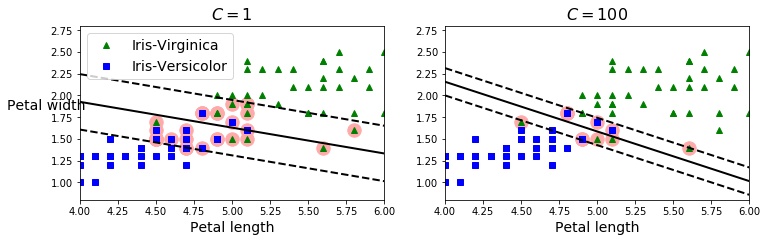

In [11]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(model_svm1, 4, 6)
plt.xlabel("Petal length", fontsize=14, rotation=0)
plt.ylabel("Petal width", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(model_svm1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(model_svm2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(model_svm2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

In [12]:
from sklearn.preprocessing import PolynomialFeatures

"""front paramters are tranformers , while the last shall only be estimator"""
"""Pipeline of transforms with a final estimator."""
model_polynomial_svm = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

model_polynomial_svm.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [13]:
poly_kernel_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_poly", SVC(kernel="poly", degree=3, coef0=100, C=5))
])
poly_kernel_svm.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_poly', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [14]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [15]:
plt.figure(figsize=(11, 4))

<Figure size 792x288 with 0 Axes>

<Figure size 792x288 with 0 Axes>

[4, 6, 0.8, 2.8]

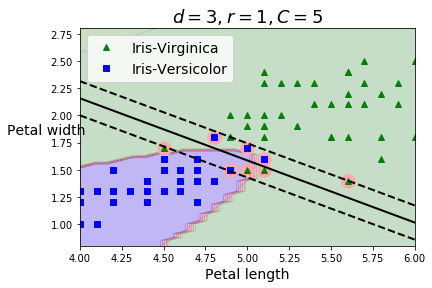

In [16]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_predictions(poly_kernel_svm, [0, 7.5, 0, 3])
plot_svc_decision_boundary(model_svm2, 4, 6)
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

In [10]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# representation of labeled data-set
#print(x_train[1])
print(y_train[:10])
print(len(x_train))
print(len(x_test))

[5 0 4 1 9 2 1 3 1 4]
60000
10000


In [11]:
x_train = x_train[:60000]
y_train = y_train[:60000]
x_test = x_test[:10000]
y_test = y_test[:10000]

In [12]:
# fix the result for every shuffle
np.random.seed(42)
# randomly permutate the sequence of the data-set
rnd_idx = np.random.permutation(60000)
x_train = x_train[rnd_idx]
y_train = y_train[rnd_idx]

In [13]:
print("array_shape: {0}\n"
      "training_data_dimension: {1}\n"
      "training_data_length: {2}\n".format(x_train[1].shape, x_train.ndim, len(x_train)))

print("array_shape: {0}\n"
      "testing_data_dimension: {1}\n"
      "testing_data_length: {2}".format(x_test[1].shape, x_test.ndim, len(x_test)))

array_shape: (28, 28)
training_data_dimension: 3
training_data_length: 60000

array_shape: (28, 28)
testing_data_dimension: 3
testing_data_length: 10000


In [14]:
x_train_reduce = np.reshape(x_train, (60000, 28*28))
x_test_reduce = np.reshape(x_test, (10000, 28*28))

In [15]:
print("array_shape: {0}\n"
      "training_data_reduce_dimension: {1}\n"
      "training_data_reduce_length: {2}\n".format(x_train_reduce[1].shape, x_train_reduce.ndim, len(x_train_reduce)))

print("array_shape: {0}\n"
      "testing_data_reduce_dimension: {1}\n"
      "testing_data_reduce_length: {2}".format(x_test_reduce[1].shape, x_test_reduce.ndim, len(x_test_reduce)))

array_shape: (784,)
training_data_reduce_dimension: 2
training_data_reduce_length: 60000

array_shape: (784,)
testing_data_reduce_dimension: 2
testing_data_reduce_length: 10000


In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reduce)
x_test_scaled = scaler.fit_transform(x_test_reduce)

In [ ]:
model_svm11 = LinearSVC(C=1, loss="hinge", random_state=42)
model_svm22 = LinearSVC(C=1, loss="hinge", random_state=42)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=7.159272548355914, gamma=0.002330255053417284 .................


[CV]  C=7.159272548355914, gamma=0.002330255053417284, score=0.8482142857142857, total=   1.5s
[CV] C=7.159272548355914, gamma=0.002330255053417284 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  C=7.159272548355914, gamma=0.002330255053417284, score=0.844311377245509, total=   1.0s
[CV] C=7.159272548355914, gamma=0.002330255053417284 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV]  C=7.159272548355914, gamma=0.002330255053417284, score=0.8575757575757575, total=   1.1s
[CV] C=10.443162424204415, gamma=0.007251548526526461 ................


[CV]  C=10.443162424204415, gamma=0.007251548526526461, score=0.7142857142857143, total=   1.2s
[CV] C=10.443162424204415, gamma=0.007251548526526461 ................


[CV]  C=10.443162424204415, gamma=0.007251548526526461, score=0.655688622754491, total=   1.1s
[CV] C=10.443162424204415, gamma=0.007251548526526461 ................


[CV]  C=10.443162424204415, gamma=0.007251548526526461, score=0.706060606060606, total=   1.1s
[CV] C=1.4788392065515124, gamma=0.02674711596485418 .................


[CV]  C=1.4788392065515124, gamma=0.02674711596485418, score=0.24404761904761904, total=   1.2s
[CV] C=1.4788392065515124, gamma=0.02674711596485418 .................


[CV]  C=1.4788392065515124, gamma=0.02674711596485418, score=0.25449101796407186, total=   1.2s
[CV] C=1.4788392065515124, gamma=0.02674711596485418 .................


[CV]  C=1.4788392065515124, gamma=0.02674711596485418, score=0.24545454545454545, total=   1.2s
[CV] C=5.8460943837360055, gamma=0.05787363457524576 .................


[CV]  C=5.8460943837360055, gamma=0.05787363457524576, score=0.16964285714285715, total=   1.2s
[CV] C=5.8460943837360055, gamma=0.05787363457524576 .................


[CV]  C=5.8460943837360055, gamma=0.05787363457524576, score=0.18562874251497005, total=   1.2s
[CV] C=5.8460943837360055, gamma=0.05787363457524576 .................


[CV]  C=5.8460943837360055, gamma=0.05787363457524576, score=0.1606060606060606, total=   1.2s
[CV] C=7.518251066916032, gamma=0.024268968751898466 .................


[CV]  C=7.518251066916032, gamma=0.024268968751898466, score=0.2648809523809524, total=   1.1s
[CV] C=7.518251066916032, gamma=0.024268968751898466 .................


[CV]  C=7.518251066916032, gamma=0.024268968751898466, score=0.26646706586826346, total=   1.2s
[CV] C=7.518251066916032, gamma=0.024268968751898466 .................


[CV]  C=7.518251066916032, gamma=0.024268968751898466, score=0.27575757575757576, total=   1.2s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[CV]  C=8.672598575312348, gamma=0.006929609303267635, score=0.7232142857142857, total=   1.1s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[CV]  C=8.672598575312348, gamma=0.006929609303267635, score=0.6646706586826348, total=   1.1s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[CV]  C=8.672598575312348, gamma=0.006929609303267635, score=0.7090909090909091, total=   1.1s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................


[CV]  C=8.925471905182384, gamma=0.001262542307589235, score=0.8571428571428571, total=   0.8s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................


[CV]  C=8.925471905182384, gamma=0.001262542307589235, score=0.8652694610778443, total=   0.8s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................


[CV]  C=8.925471905182384, gamma=0.001262542307589235, score=0.8727272727272727, total=   0.8s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................


[CV]  C=8.655274047166163, gamma=0.0187333598108448, score=0.375, total=   1.2s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................


[CV]  C=8.655274047166163, gamma=0.0187333598108448, score=0.3263473053892216, total=   1.2s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................


[CV]  C=8.655274047166163, gamma=0.0187333598108448, score=0.39090909090909093, total=   1.2s
[CV] C=6.6666504120151195, gamma=0.004328139384576848 ................


[CV]  C=6.6666504120151195, gamma=0.004328139384576848, score=0.7976190476190477, total=   1.1s
[CV] C=6.6666504120151195, gamma=0.004328139384576848 ................


[CV]  C=6.6666504120151195, gamma=0.004328139384576848, score=0.7634730538922155, total=   1.1s
[CV] C=6.6666504120151195, gamma=0.004328139384576848 ................


[CV]  C=6.6666504120151195, gamma=0.004328139384576848, score=0.796969696969697, total=   1.1s
[CV] C=2.1411260843123205, gamma=0.01969707028717445 .................


[CV]  C=2.1411260843123205, gamma=0.01969707028717445, score=0.3541666666666667, total=   1.2s
[CV] C=2.1411260843123205, gamma=0.01969707028717445 .................


[CV]  C=2.1411260843123205, gamma=0.01969707028717445, score=0.3083832335329341, total=   1.2s
[CV] C=2.1411260843123205, gamma=0.01969707028717445 .................


[CV]  C=2.1411260843123205, gamma=0.01969707028717445, score=0.35454545454545455, total=   1.2s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   52.1s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014F85F28D68>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014F85F284E0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=3)

following displayed SVC model's awaiting to be rectified with CV

In [ ]:
svm_clf = SVC(kernel="rbf", decision_function_shape="ovr")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=7.159272548355914, gamma=0.002330255053417284 .................


[CV]  C=7.159272548355914, gamma=0.002330255053417284, score=0.8482142857142857, total=   1.5s
[CV] C=7.159272548355914, gamma=0.002330255053417284 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  C=7.159272548355914, gamma=0.002330255053417284, score=0.844311377245509, total=   1.0s
[CV] C=7.159272548355914, gamma=0.002330255053417284 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV]  C=7.159272548355914, gamma=0.002330255053417284, score=0.8575757575757575, total=   1.1s
[CV] C=10.443162424204415, gamma=0.007251548526526461 ................


[CV]  C=10.443162424204415, gamma=0.007251548526526461, score=0.7142857142857143, total=   1.2s
[CV] C=10.443162424204415, gamma=0.007251548526526461 ................


[CV]  C=10.443162424204415, gamma=0.007251548526526461, score=0.655688622754491, total=   1.1s
[CV] C=10.443162424204415, gamma=0.007251548526526461 ................


[CV]  C=10.443162424204415, gamma=0.007251548526526461, score=0.706060606060606, total=   1.1s
[CV] C=1.4788392065515124, gamma=0.02674711596485418 .................


[CV]  C=1.4788392065515124, gamma=0.02674711596485418, score=0.24404761904761904, total=   1.2s
[CV] C=1.4788392065515124, gamma=0.02674711596485418 .................


[CV]  C=1.4788392065515124, gamma=0.02674711596485418, score=0.25449101796407186, total=   1.2s
[CV] C=1.4788392065515124, gamma=0.02674711596485418 .................


[CV]  C=1.4788392065515124, gamma=0.02674711596485418, score=0.24545454545454545, total=   1.2s
[CV] C=5.8460943837360055, gamma=0.05787363457524576 .................


[CV]  C=5.8460943837360055, gamma=0.05787363457524576, score=0.16964285714285715, total=   1.2s
[CV] C=5.8460943837360055, gamma=0.05787363457524576 .................


[CV]  C=5.8460943837360055, gamma=0.05787363457524576, score=0.18562874251497005, total=   1.2s
[CV] C=5.8460943837360055, gamma=0.05787363457524576 .................


[CV]  C=5.8460943837360055, gamma=0.05787363457524576, score=0.1606060606060606, total=   1.2s
[CV] C=7.518251066916032, gamma=0.024268968751898466 .................


[CV]  C=7.518251066916032, gamma=0.024268968751898466, score=0.2648809523809524, total=   1.1s
[CV] C=7.518251066916032, gamma=0.024268968751898466 .................


[CV]  C=7.518251066916032, gamma=0.024268968751898466, score=0.26646706586826346, total=   1.2s
[CV] C=7.518251066916032, gamma=0.024268968751898466 .................


[CV]  C=7.518251066916032, gamma=0.024268968751898466, score=0.27575757575757576, total=   1.2s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[CV]  C=8.672598575312348, gamma=0.006929609303267635, score=0.7232142857142857, total=   1.1s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[CV]  C=8.672598575312348, gamma=0.006929609303267635, score=0.6646706586826348, total=   1.1s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[CV]  C=8.672598575312348, gamma=0.006929609303267635, score=0.7090909090909091, total=   1.1s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................


[CV]  C=8.925471905182384, gamma=0.001262542307589235, score=0.8571428571428571, total=   0.8s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................


[CV]  C=8.925471905182384, gamma=0.001262542307589235, score=0.8652694610778443, total=   0.8s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................


[CV]  C=8.925471905182384, gamma=0.001262542307589235, score=0.8727272727272727, total=   0.8s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................


[CV]  C=8.655274047166163, gamma=0.0187333598108448, score=0.375, total=   1.2s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................


[CV]  C=8.655274047166163, gamma=0.0187333598108448, score=0.3263473053892216, total=   1.2s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................


[CV]  C=8.655274047166163, gamma=0.0187333598108448, score=0.39090909090909093, total=   1.2s
[CV] C=6.6666504120151195, gamma=0.004328139384576848 ................


[CV]  C=6.6666504120151195, gamma=0.004328139384576848, score=0.7976190476190477, total=   1.1s
[CV] C=6.6666504120151195, gamma=0.004328139384576848 ................


[CV]  C=6.6666504120151195, gamma=0.004328139384576848, score=0.7634730538922155, total=   1.1s
[CV] C=6.6666504120151195, gamma=0.004328139384576848 ................


[CV]  C=6.6666504120151195, gamma=0.004328139384576848, score=0.796969696969697, total=   1.1s
[CV] C=2.1411260843123205, gamma=0.01969707028717445 .................


[CV]  C=2.1411260843123205, gamma=0.01969707028717445, score=0.3541666666666667, total=   1.2s
[CV] C=2.1411260843123205, gamma=0.01969707028717445 .................


[CV]  C=2.1411260843123205, gamma=0.01969707028717445, score=0.3083832335329341, total=   1.2s
[CV] C=2.1411260843123205, gamma=0.01969707028717445 .................


[CV]  C=2.1411260843123205, gamma=0.01969707028717445, score=0.35454545454545455, total=   1.2s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   52.1s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014F85F28D68>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014F85F284E0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=3)

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import cross_val_score

In [19]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=3, scoring='accuracy')
rnd_search_cv.fit(x_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=7.159272548355914, gamma=0.002330255053417284 .................


[CV]  C=7.159272548355914, gamma=0.002330255053417284, score=0.8482142857142857, total=   1.5s
[CV] C=7.159272548355914, gamma=0.002330255053417284 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  C=7.159272548355914, gamma=0.002330255053417284, score=0.844311377245509, total=   1.0s
[CV] C=7.159272548355914, gamma=0.002330255053417284 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV]  C=7.159272548355914, gamma=0.002330255053417284, score=0.8575757575757575, total=   1.1s
[CV] C=10.443162424204415, gamma=0.007251548526526461 ................


[CV]  C=10.443162424204415, gamma=0.007251548526526461, score=0.7142857142857143, total=   1.2s
[CV] C=10.443162424204415, gamma=0.007251548526526461 ................


[CV]  C=10.443162424204415, gamma=0.007251548526526461, score=0.655688622754491, total=   1.1s
[CV] C=10.443162424204415, gamma=0.007251548526526461 ................


[CV]  C=10.443162424204415, gamma=0.007251548526526461, score=0.706060606060606, total=   1.1s
[CV] C=1.4788392065515124, gamma=0.02674711596485418 .................


[CV]  C=1.4788392065515124, gamma=0.02674711596485418, score=0.24404761904761904, total=   1.2s
[CV] C=1.4788392065515124, gamma=0.02674711596485418 .................


[CV]  C=1.4788392065515124, gamma=0.02674711596485418, score=0.25449101796407186, total=   1.2s
[CV] C=1.4788392065515124, gamma=0.02674711596485418 .................


[CV]  C=1.4788392065515124, gamma=0.02674711596485418, score=0.24545454545454545, total=   1.2s
[CV] C=5.8460943837360055, gamma=0.05787363457524576 .................


[CV]  C=5.8460943837360055, gamma=0.05787363457524576, score=0.16964285714285715, total=   1.2s
[CV] C=5.8460943837360055, gamma=0.05787363457524576 .................


[CV]  C=5.8460943837360055, gamma=0.05787363457524576, score=0.18562874251497005, total=   1.2s
[CV] C=5.8460943837360055, gamma=0.05787363457524576 .................


[CV]  C=5.8460943837360055, gamma=0.05787363457524576, score=0.1606060606060606, total=   1.2s
[CV] C=7.518251066916032, gamma=0.024268968751898466 .................


[CV]  C=7.518251066916032, gamma=0.024268968751898466, score=0.2648809523809524, total=   1.1s
[CV] C=7.518251066916032, gamma=0.024268968751898466 .................


[CV]  C=7.518251066916032, gamma=0.024268968751898466, score=0.26646706586826346, total=   1.2s
[CV] C=7.518251066916032, gamma=0.024268968751898466 .................


[CV]  C=7.518251066916032, gamma=0.024268968751898466, score=0.27575757575757576, total=   1.2s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[CV]  C=8.672598575312348, gamma=0.006929609303267635, score=0.7232142857142857, total=   1.1s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[CV]  C=8.672598575312348, gamma=0.006929609303267635, score=0.6646706586826348, total=   1.1s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[CV]  C=8.672598575312348, gamma=0.006929609303267635, score=0.7090909090909091, total=   1.1s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................


[CV]  C=8.925471905182384, gamma=0.001262542307589235, score=0.8571428571428571, total=   0.8s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................


[CV]  C=8.925471905182384, gamma=0.001262542307589235, score=0.8652694610778443, total=   0.8s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................


[CV]  C=8.925471905182384, gamma=0.001262542307589235, score=0.8727272727272727, total=   0.8s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................


[CV]  C=8.655274047166163, gamma=0.0187333598108448, score=0.375, total=   1.2s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................


[CV]  C=8.655274047166163, gamma=0.0187333598108448, score=0.3263473053892216, total=   1.2s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................


[CV]  C=8.655274047166163, gamma=0.0187333598108448, score=0.39090909090909093, total=   1.2s
[CV] C=6.6666504120151195, gamma=0.004328139384576848 ................


[CV]  C=6.6666504120151195, gamma=0.004328139384576848, score=0.7976190476190477, total=   1.1s
[CV] C=6.6666504120151195, gamma=0.004328139384576848 ................


[CV]  C=6.6666504120151195, gamma=0.004328139384576848, score=0.7634730538922155, total=   1.1s
[CV] C=6.6666504120151195, gamma=0.004328139384576848 ................


[CV]  C=6.6666504120151195, gamma=0.004328139384576848, score=0.796969696969697, total=   1.1s
[CV] C=2.1411260843123205, gamma=0.01969707028717445 .................


[CV]  C=2.1411260843123205, gamma=0.01969707028717445, score=0.3541666666666667, total=   1.2s
[CV] C=2.1411260843123205, gamma=0.01969707028717445 .................


[CV]  C=2.1411260843123205, gamma=0.01969707028717445, score=0.3083832335329341, total=   1.2s
[CV] C=2.1411260843123205, gamma=0.01969707028717445 .................


[CV]  C=2.1411260843123205, gamma=0.01969707028717445, score=0.35454545454545455, total=   1.2s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   52.1s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014F85F28D68>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014F85F284E0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=3)

In [23]:
# search for optimal & computationally efficient data size
# from 1000 to 4000 with step size equals to 600
size_range = list(np.linspace(1000, 4000, num=6))

# 列表解析 强制类型转换列表条目为int(automatically set up new list-container)
size_range_int = [int(i) for i in size_range]
CV_scores = []
for size_variable in size_range_int:
    # knn = KNeighborsClassifier(n_neighbors=k)
    
    x_variable = x_train_scaled[:size_variable]
    y_variable = y_train[:size_variable]
    
    scores = cross_val_score(svm_clf, x_variable, y_variable, cv=10, scoring='accuracy')
    CV_scores.append(scores.mean())

print('{:^20} {}'.format('data-size', 'accuracy'))
size_sign = 0;
for score_item in CV_scores:
    print('{:^20} {}'.format(str(size_range_int[size_sign]), score_item))
    size_sign = size_sign+1


     data-size       accuracy
        1000         0.8689759410032941
        1600         0.8906343932154186
        2200         0.903722360679498
        2800         0.9160517618666107
        3400         0.9190889816381226
        4000         0.9220187758894015


In [16]:
model_svm11.fit(x_train_reduce[:20000], y_train[:20000])
model_svm22.fit(x_train_scaled[:20000], y_train[:20000])
svm_clf.fit(x_train_scaled[:50000], y_train[:50000])

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [17]:
from sklearn.metrics import accuracy_score
y_pred_linear = model_svm11.predict(x_test_scaled)
y_pred_linear_scaled = model_svm22.predict(x_test_scaled)
y_pred_nonlinear = svm_clf.predict(x_test_scaled)
print("linear_kernel_OA: {0}\n"
       "linear_kernel_scaled_OA: {1}\n"
       "nonlinear_kernel_OA: {2}"
       .format(accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_linear_scaled), accuracy_score(y_test, y_pred_nonlinear)))
print("linear_kernel_OA: {0}\n"
      "linear_kernel_scaled_OA: {1}\n"
      .format(accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_linear_scaled)))

linear_kernel_OA: 0.7804
linear_kernel_scaled_OA: 0.8973

